In [33]:
# importação das bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
dataframe = pd.read_csv('listings.csv')
dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


In [18]:
dataframe.isna().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6173
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        590
reviews_per_month                  590
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            415
dtype: int64

In [20]:
dataframe.shape

(6173, 18)

In [22]:
dataframe1 = dataframe.dropna(subset=['neighbourhood'], axis = 0)['neighbourhood']
dataframe1

0       IJburg - Zeeburgereiland
1                     Noord-Oost
2                     Noord-West
3          Gaasperdam - Driemond
4          Gaasperdam - Driemond
                  ...           
6168      Buitenveldert - Zuidas
6169             Watergraafsmeer
6170                  Noord-West
6171      Buitenveldert - Zuidas
6172             Watergraafsmeer
Name: neighbourhood, Length: 6173, dtype: object

In [25]:
display(dataframe1.iloc[99])

'Centrum-West'

In [30]:
all_neighbourhoods = " ".join(n for n in dataframe1)
all_neighbourhoods

'IJburg - Zeeburgereiland Noord-Oost Noord-West Gaasperdam - Driemond Gaasperdam - Driemond Watergraafsmeer Watergraafsmeer Watergraafsmeer Watergraafsmeer Noord-Oost Bijlmer-Centrum Watergraafsmeer Gaasperdam - Driemond Gaasperdam - Driemond IJburg - Zeeburgereiland Bijlmer-Centrum Watergraafsmeer Watergraafsmeer Watergraafsmeer Geuzenveld - Slotermeer Geuzenveld - Slotermeer Watergraafsmeer Westerpark Buitenveldert - Zuidas Oostelijk Havengebied - Indische Buurt Centrum-Oost Centrum-West Centrum-West Centrum-Oost Centrum-Oost Centrum-West Centrum-West Centrum-Oost Zuid Oud-Oost Centrum-West Centrum-West De Pijp - Rivierenbuurt Slotervaart Zuid De Pijp - Rivierenbuurt De Baarsjes - Oud-West Centrum-West Centrum-West De Baarsjes - Oud-West De Pijp - Rivierenbuurt De Baarsjes - Oud-West Centrum-West Centrum-Oost Centrum-West Centrum-West De Baarsjes - Oud-West Centrum-West De Baarsjes - Oud-West Centrum-Oost Centrum-West De Pijp - Rivierenbuurt Zuid Bos en Lommer Zuid Geuzenveld - Slote

In [31]:

stopwords = set(STOPWORDS)


In [35]:
cloud = WordCloud(stopwords = stopwords, background_color = 'black', 
                  width = 1600, height = 800).generate(all_neighbourhoods)

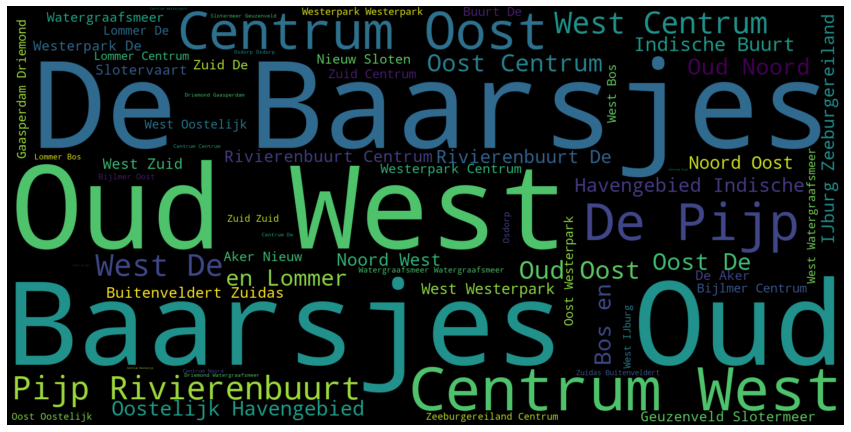

In [38]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(cloud, interpolation = 'bilinear')
ax.set_axis_off()